# H5XRAY

How to generate xray plots for HDF5 files to indicate cloud friendliness (required number of GET requests to fully read).

__Jonathan Markel__  
3D Geospatial Laboratory  
The University of Texas at Austin  
Last Updated: 11/06/2023

#### [Twitter](https://twitter.com/jonm3d) | [GitHub](https://github.com/jonm3d) | [Website](http://j3d.space) | [GoogleScholar](https://scholar.google.com/citations?user=KwxwFgYAAAAJ&hl=en) | [LinkedIn](https://www.linkedin.com/in/j-markel/) 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
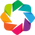

In [1]:
from h5xray import h5xray

In [2]:
input_file = "data/ATL08_icesat2.h5"


In [3]:
# main function for notebook interaction
help(h5xray.analyze)

Help on function analyze in module h5xray.h5xray:

analyze(input_file, request_byte_size=2097152, plotting_options={}, report=True, cost_per_request=4e-07, aws_access_key=None, aws_secret_key=None, report_type='print')
    Main function for plotting / reporting details of an HDF5 or NetCDF file.
    
    Args:
        input_file (str): Path to the input HDF5 or NetCDF file or S3 URL.
        request_byte_size (int): The size of each request in bytes. Default is 2MiB (2*1024*1024 bytes).
        plotting_options (dict): A dictionary of plotting options.
        report (bool): Whether to print a report about the HDF5 or NetCDF file. Default is True.
        cost_per_request (float): Cost per GET request (default: $0.0004 per 1000 requests).
        aws_access_key (str, optional): AWS access key for S3 URLs.
        aws_secret_key (str, optional): AWS secret key for S3 URLs.
        report_type (str): Format of the report output, either 'str' for string or 'print' to print directly.
    


## Default Usage
At it's core, h5xray is meant to quickly visualize and report on the structure of and requests needed to read an HDF5 file. The barcode plot below shows blocks for each dataset within the H5 file. The width of a block represents the total size in bytes, and color indicates how many GET requests are needed to read in that data (blue is few). For the same size request / colorbar, more red = more requests = more $ to read from cloud storage.

Processing Time: 0.116 seconds
Data Summary:
  - Total datasets: 660
  - Total requests: 661.0
  - Request byte size: 2.0 MiB
Cost Analysis:
  - Assumed cost per 1,000 GET requests: $0.0004000000
  - Total cost for file: $0.0002644000
--------------------------------------------------
Top 5 datasets by number of requests:
  - /gt3l/signal_photons/ph_h - 2.0 requests | Chunking: (10000,) | Number of Chunks: [76.0]
  - /ancillary_data/atlas_sdp_gps_epoch - 1.0 requests | Contiguous
  - /ancillary_data/control - 1.0 requests | Chunking: (1,) | Number of Chunks: [1.0]
  - /ancillary_data/data_end_utc - 1.0 requests | Contiguous
  - /ancillary_data/data_start_utc - 1.0 requests | Contiguous
--------------------------------------------------
System Information:
  - OS: posix
  - Platform: Darwin
  - Platform Release: 23.1.0
  - Python Version: 3.10.0
  - Machine: arm64
  - Processor: arm
  - Working Directory: /Users/jonathan/Documents/Research/h5xray/examples
  - Host Name: URSA.local
  - C

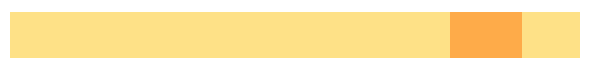

(<Figure size 600x80 with 1 Axes>, None)

In [4]:
h5xray.analyze(input_file) # default usage

For more programmatic uses, the report can be silenced and the plot can be saved to disk.

Plot saved to img/barcode.png


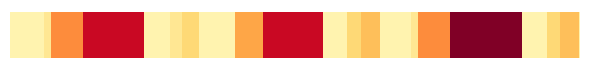

In [5]:
f, report = h5xray.analyze(input_file, 
                      request_byte_size=0.2*1024*1024,      # size of get request
                      plotting_options={'output_file':'img/barcode.png'}, 
                      report_type='str') 

# print(report)

## Request Details
It may be helpful to manually control the size of the GET requests when reading in data. Let's see how using larger GET requests changes the number needed to read in all the data, especially for larger datasets. Here, we see that the largest datasets needed fewer requests, and the barcode is lighter / bluer overall.


Processing Time: 0.120 seconds
Data Summary:
  - Total datasets: 660
  - Total requests: 678.0
  - Request byte size: 0.5 MiB
Cost Analysis:
  - Assumed cost per 1,000 GET requests: $0.0004000000
  - Total cost for file: $0.0002712000
--------------------------------------------------
Top 5 datasets by number of requests:
  - /gt3l/signal_photons/ph_h - 5.0 requests | Chunking: (10000,) | Number of Chunks: [76.0]
  - /gt1l/signal_photons/ph_h - 4.0 requests | Chunking: (10000,) | Number of Chunks: [65.0]
  - /gt2l/signal_photons/ph_h - 4.0 requests | Chunking: (10000,) | Number of Chunks: [65.0]
  - /gt1l/signal_photons/delta_time - 3.0 requests | Chunking: (10000,) | Number of Chunks: [65.0]
  - /gt3l/signal_photons/delta_time - 3.0 requests | Chunking: (10000,) | Number of Chunks: [76.0]
--------------------------------------------------
System Information:
  - OS: posix
  - Platform: Darwin
  - Platform Release: 23.1.0
  - Python Version: 3.10.0
  - Machine: arm64
  - Processor: arm

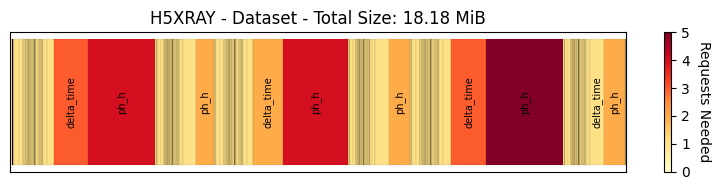

In [6]:
f, _ = h5xray.analyze(input_file, 
               request_byte_size=0.5*1024*1024,     # 0.5 MB for visualization purposes
               cost_per_request=0.0004e-3,          # cost to read ($0.0004 per 1000 requests for S3)
               plotting_options={'debug':True, # show title, axis labels, colorbar, etc
                                'output_file':'img/request_details.png', # where to write the output image
                                },
               report_type='print')

## Plot Customization
Minor plot details will likely differ between HDF5 files, including the range of the colorbar, the colormap, the title, and the figure size. The font size of the dataset labels, and the threshold (in bytes) required to label a dataset can be changed for smaller/larger files.

In [7]:
import matplotlib.pyplot as plt # for specifying colormap

Processing Time: 0.120 seconds
Data Summary:
  - Total datasets: 660
  - Total requests: 790.0
  - Request byte size: 0.1 MiB
Cost Analysis:
  - Assumed cost per 1,000 GET requests: $0.0004000000
  - Total cost for file: $0.0003160000
--------------------------------------------------
Top 5 datasets by number of requests:
  - /gt3l/signal_photons/ph_h - 23.0 requests | Chunking: (10000,) | Number of Chunks: [76.0]
  - /gt1l/signal_photons/ph_h - 20.0 requests | Chunking: (10000,) | Number of Chunks: [65.0]
  - /gt2l/signal_photons/ph_h - 20.0 requests | Chunking: (10000,) | Number of Chunks: [65.0]
  - /gt1l/signal_photons/delta_time - 11.0 requests | Chunking: (10000,) | Number of Chunks: [65.0]
  - /gt3l/signal_photons/delta_time - 11.0 requests | Chunking: (10000,) | Number of Chunks: [76.0]
--------------------------------------------------
System Information:
  - OS: posix
  - Platform: Darwin
  - Platform Release: 23.1.0
  - Python Version: 3.10.0
  - Machine: arm64
  - Processor

(<Figure size 1000x300 with 2 Axes>, None)

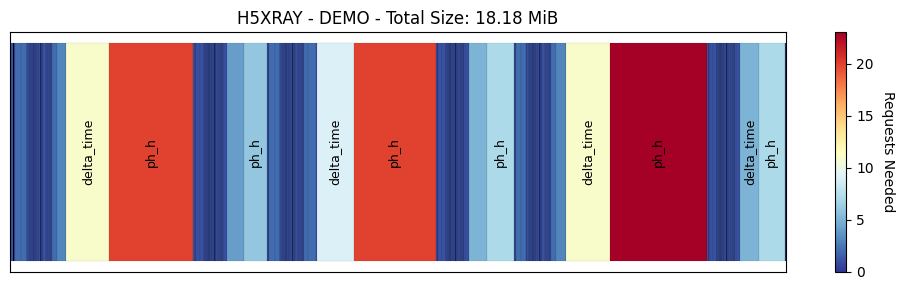

In [8]:
# try changing these!
plotting_options = {'debug':True, # whether to include the title, colormap, and labels
                    'cmap': plt.cm.RdYlBu_r, 
                    'byte_threshold':10 * 1024**2, # datasets with more than this get labeled
                    'font_size':9, # font size for dataset labels
                    'figsize':(10, 3),
                    'max_requests': 20, # specify colormap range
                    'title':'DEMO',
                    'output_file':'img/options_all.png'
                   }

h5xray.analyze(input_file, 
               request_byte_size=0.1*1024*1024, # 0.1 MB for small file visualizations
               report=True, plotting_options=plotting_options)


## Get in touch!

**Jonathan Markel, PhD Student**<br>
3D Geospatial Laboratory, UT Austin<br>
[j3d.space](https://www.j3d.space) <br>
[@jonm3d](https://www.twitter.com/jonm3d)